# tnc-edge-catch-plots

This notebook fetches BV and AI detection data and produces plots.

In [1]:
# aws_config = {
# 'aws_access_key_id':'XXXXXX',
# 'aws_secret_access_key':'XXXXXX',
# 'aws_session_token':'XXXXXX'
# }

aws_config = {}

aws_config['profile_name'] ='XXXXXX'
aws_config['region_name'] = 'us-east-1'

import boto3

boto3.setup_default_session(**aws_config)

s3 = boto3.client('s3')

# s3.list_objects(Bucket='51-gema-dev-dp-raw' , Prefix='tnc_edge/')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/boto3/compat.py:82: PythonDeprecationWarning: Boto3 will no longer support Python 3.7 starting December 13, 2023. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.8 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


In [15]:
import pandas
import awswrangler
import json
import re
from datetime import datetime, timezone
def display_full(x):
    pandas.set_option('display.max_rows', 1000)
    pandas.set_option('display.min_rows', 400)
    pandas.set_option('display.max_columns', None)
    pandas.set_option('display.width', 2000)
    pandas.set_option('display.float_format', '{:20,.2f}'.format)
    pandas.set_option('display.max_colwidth', None)
    display(x)
    pandas.reset_option('display.max_rows')
    pandas.reset_option('display.max_columns')
    pandas.reset_option('display.width')
    pandas.reset_option('display.float_format')
    pandas.reset_option('display.max_colwidth')


In [ ]:
elog_df = awswrangler.athena.read_sql_query(f"SELECT id,jsonblob,datetime from stpatrick_v1_deckhandevents where jsonblob like '%\"eventType\": \"tripDetailsEvent\"%' and datetime < '2024-02-01';", database='tnc_edge')
elog_df['jsonblob'] = elog_df['jsonblob'].apply(lambda x: re.sub('"gearPhoto": "[^"]*"', '', x))
# elog_df['euuid'] = elog_df['json'].apply(lambda x: x['eventId'])
# elog_df['tuuid'] = elog_df['json'].apply(lambda x: x['tripId'])

display_full(elog_df.sort_values('datetime'))

In [ ]:
s = awswrangler.athena.read_sql_query(f"SELECT stpatrick_v1_video_files.*, stpatrick_v1_ondeckdata.video_uri, stpatrick_v1_ondeckdata.cocoannotations_uri, stpatrick_v1_ondeckdata.datetime, stpatrick_v1_ondeckdata.overallcount, stpatrick_v1_ondeckdata.overallruntimems, stpatrick_v1_ondeckdata.tracked_confidence, stpatrick_v1_ondeckdata.status, stpatrick_v1_ondeckdata.overallcatches, stpatrick_v1_ondeckdata.overalldiscards, stpatrick_v1_ondeckdata.detection_confidence FROM stpatrick_v1_video_files left join stpatrick_v1_ondeckdata on decrypted_path = video_uri where cam_name = 'cam1' and start_datetime > '2024-03-01' order by start_datetime asc limit 10000", database='tnc_edge')
display(s)

In [ ]:
pandas.set_option('display.max_rows', 500)
pandas.set_option('display.min_rows', 500)

display(s[['start_datetime','status']])

In [30]:
s = awswrangler.athena.read_sql_query(f"SELECT * FROM stpatrick_v1_deckhandevents_mostrecentlonglineevent_jsonextracted where datetime > '2024-03-01'", database='tnc_edge')
s

,id,jsonblob,datetime,bycatchcount,catchcount,systemstartsetdatetime,systemstartsetlatitude,systemstartsetlongitude,systemendsetdatetime,systemendsetlatitude,...,systemstarthaullongitude,systemendhauldatetime,systemendhaullatitude,systemendhaullongitude,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2
0,115,"{""catch"": [{""amount"": 3, ""species"": ""Thunnus a...",2024-04-02 11:09:37.706932-07,0,48,2024-04-01 08:04:50.070555-07,7.75136,-88.40382,2024-04-01 12:48:20.528011-07,7.6831,...,-87.78765,2024-04-02 10:46:50.073397-07,7.29759,-88.04485,2024-04-02 18:17:04,2024/4/2/1712081814-0.csv,8b3b4999-0db8-4463-ab29-a63b81827f02,2024,4,2
1,105,"{""catch"": [{""amount"": 2, ""species"": ""Coryphaen...",2024-03-12 08:04:44.572427-07,0,16,2024-03-11 04:32:06.48335-07,8.4222,-88.2238,2024-03-11 09:40:00.396497-07,8.32215,...,-87.90758,2024-03-12 07:33:42.241252-07,8.17129,-88.16075,2024-03-12 15:14:56,2024/3/12/1710256492-0.csv,f338bfb7-4483-48f1-aa69-491d2b7469eb,2024,3,12
2,109,"{""catch"": [{""amount"": 5, ""species"": ""Coryphaen...",2024-03-20 10:00:31.191693-07,0,32,2024-03-19 04:45:45.149306-07,6.2161,-89.1541,2024-03-19 08:55:19.868922-07,6.43814,...,-89.03575,2024-03-20 09:06:59.014199-07,6.18406,-89.26512,2024-03-20 17:12:52,2024/3/20/1710954769-0.csv,cb041839-8a1c-4418-abcc-3bdc426827d4,2024,3,20
3,114,"{""catch"": [{""amount"": 1, ""species"": ""Coryphaen...",2024-03-30 10:36:17.068835-07,0,8,2024-03-29 08:36:38.904599-07,5.83707,-90.80938,2024-03-29 13:11:25.115122-07,5.64898,...,-91.21811,2024-03-30 10:23:46.999958-07,6.21268,-91.02086,2024-03-30 17:52:55,2024/3/30/1711821172-0.csv,8885bb28-3a6b-4370-a343-3b494b9170cb,2024,3,30
4,113,"{""catch"": [{""amount"": 3, ""species"": ""Kajikia a...",2024-03-27 10:01:42.623128-07,0,21,2024-03-26 05:10:28.483234-07,5.89978,-90.15076,2024-03-26 10:15:34.99601-07,5.7343,...,-90.14435,2024-03-27 08:32:30.309867-07,5.90253,-90.09214,2024-03-27 17:56:25,2024/3/27/1711562178-0.csv,89193f5d-3c85-4529-af90-a318b118a0b3,2024,3,27
5,106,"{""catch"": [{""amount"": 1, ""species"": ""Coryphaen...",2024-03-14 06:53:05.123168-07,0,1,2024-03-13 10:54:44.760881-07,6.96374,-87.74574,2024-03-13 14:50:21.662708-07,6.76889,...,-87.17901,2024-03-14 06:52:36.475474-07,6.64655,-87.33797,2024-03-14 14:02:52,2024/3/14/1710424964-0.csv,1820e6ac-1e21-497c-99e1-3e2b0e369afb,2024,3,14
6,107,"{""catch"": [{""amount"": 1, ""species"": ""Coryphaen...",2024-03-16 09:40:19.536645-07,0,41,2024-03-15 11:27:06.040811-07,6.22219,-89.27102,2024-03-15 15:50:42.925573-07,5.85495,...,-89.65768,2024-03-16 09:25:35.696095-07,6.05803,-89.53677,2024-03-16 17:34:27,2024/3/16/1710610464-0.csv,d31bbf16-a26e-4d16-9de0-9f46c1a86473,2024,3,16
7,117,"{""catch"": [{""amount"": 1, ""species"": ""Thunnus a...",2024-04-05 10:57:53.668648-07,0,13,2024-04-04 11:58:21.698949-07,8.38955,-85.85574,2024-04-04 16:23:08.607664-07,8.52945,...,-85.51185,2024-04-05 10:31:01.704317-07,8.35834,-85.73204,2024-04-05 18:57:17,2024/4/5/1712343429-0.csv,c139d0d7-84c1-4182-bdc5-882e0dac6d61,2024,4,5
8,111,"{""catch"": [{""amount"": 1, ""species"": ""Thunnus a...",2024-03-23 15:39:20.567963-07,0,2,2024-03-22 09:55:07.750968-07,6.02006,-89.42516,2024-03-22 15:00:08.697158-07,6.07743,...,-89.84021,2024-03-23 15:38:55.660401-07,5.84152,-89.56645,2024-03-24 00:04:00,2024/3/24/1711238635-0.csv,28d4047e-6cc5-4564-9e3c-31c8f6eabd3f,2024,3,24
9,110,"{""catch"": [{""amount"": 4, ""species"": ""Thunnus a...",2024-03-22 09:27:52.788538-07,0,36,2024-03-21 09:00:31.159934-07,6.12827,-89.39724,2024-03-21 13:48:45.830208-07,6.40503,...,-89.59831,2024-03-22 09:02:23.36409-07,6.02146,-89.42958,2024-03-22 16:33:29,2024/3/22/1711125204-0.csv,e5c38060-6f35-4101-8edb-0fe5f2339506,2024,3,22


In [31]:
d = s.copy()
d = d.sort_values('systemstartsetdatetime')
for i in ["systemstartsetdatetime","systemendsetdatetime","systemstarthauldatetime","systemendhauldatetime"]:
    d[i] = pandas.to_datetime(s[i])
    d[i] = d[i].transform(lambda x: x.astimezone(timezone.utc))
d[["systemstartsetdatetime","systemstartsetlatitude","systemstartsetlongitude","systemendsetdatetime","systemendsetlatitude","systemendsetlongitude","systemstarthauldatetime","systemstarthaullatitude","systemstarthaullongitude","systemendhauldatetime","systemendhaullatitude","systemendhaullongitude"]].to_csv()

',systemstartsetdatetime,systemstartsetlatitude,systemstartsetlongitude,systemendsetdatetime,systemendsetlatitude,systemendsetlongitude,systemstarthauldatetime,systemstarthaullatitude,systemstarthaullongitude,systemendhauldatetime,systemendhaullatitude,systemendhaullongitude\n1,2024-03-11 11:32:06.483350+00:00,8.4222,-88.2238,2024-03-11 16:40:00.396497+00:00,8.32215,-87.87819,2024-03-11 23:00:59.377450+00:00,8.24091,-87.90758,2024-03-12 14:33:42.241252+00:00,8.17129,-88.16075\n5,2024-03-13 17:54:44.760881+00:00,6.96374,-87.74574,2024-03-13 21:50:21.662708+00:00,6.76889,-87.40458,2024-03-14 10:20:35.515921+00:00,6.63203,-87.17901,2024-03-14 13:52:36.475474+00:00,6.64655,-87.33797\n6,2024-03-15 18:27:06.040811+00:00,6.22219,-89.27102,2024-03-15 22:50:42.925573+00:00,5.85495,-89.51634,2024-03-16 11:17:25.522995+00:00,5.80742,-89.65768,2024-03-16 16:25:35.696095+00:00,6.05803,-89.53677\n11,2024-03-16 19:10:42.624056+00:00,6.23652,-89.49371,2024-03-16 22:44:53.718167+00:00,6.4963,-89.51722,

In [39]:
trip_df = awswrangler.athena.read_sql_query(f"SELECT * FROM brancol_v1_bv_trips", database="tnc_edge")
trip_df

,trip_id,trip_start_date,trip_end_date,trip_notes,obsv_name,md_timestamp_added,md_file_name,md_ingest_uuid
0,brancol_2024-01-05,2024-01-05,2024-01-26,We don't have the exact date of return to port...,Pierre GUILLO-LOHAN,2024-03-01 20:33:28,brancol_2024_01_05-0.csv,51931968-3f6b-4aa8-b2bb-6d0fb3c3e9a3
1,brancol_2024-02-03,2024-02-03,2024-02-28,<NA>,Joachim WINKLER,2024-03-22 19:44:06,brancol_2024_02_03-0.csv,0af16428-3b20-4b64-8960-8dbd5c5e6964


In [52]:
trip_df = awswrangler.athena.read_sql_query(f"SELECT * FROM stpatrick_v1_bv_trips", database="tnc_edge")
trip_df

,trip_id,trip_start_date,trip_end_date,trip_notes,obsv_name,md_timestamp_added,md_file_name,md_ingest_uuid
0,stpatrick_2024-02-03,2024-02-03,2024-02-28,One fisherman is throwing sharks fins to the w...,Régis LE MERDY,2024-03-27 20:30:04,stpatrick_2024_02_03-0.csv,fb07bdc7-6a98-4725-b96e-f523c9d231a6
1,stpatrick_2024-01-03,2024-01-03,2024-01-29,<NA>,Régis LE MERDY,2024-03-14 21:16:17,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952


In [58]:
# sets_df = awswrangler.athena.read_sql_query(f"SELECT * FROM brancol_v1_bv_sets", database="tnc_edge")
sets_df = awswrangler.athena.read_sql_query(f"SELECT * FROM stpatrick_v1_deckhandevents_mostrecentlonglineevent_jsonextracted where datetime > '2024-03-01'", database="tnc_edge")
sets_df

,id,jsonblob,datetime,bycatchcount,catchcount,systemstartsetdatetime,systemstartsetlatitude,systemstartsetlongitude,systemendsetdatetime,systemendsetlatitude,...,systemstarthaullongitude,systemendhauldatetime,systemendhaullatitude,systemendhaullongitude,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2
0,111,"{""catch"": [{""amount"": 1, ""species"": ""Thunnus a...",2024-03-23 15:39:20.567963-07,0,2,2024-03-22 09:55:07.750968-07,6.02006,-89.42516,2024-03-22 15:00:08.697158-07,6.07743,...,-89.84021,2024-03-23 15:38:55.660401-07,5.84152,-89.56645,2024-03-24 00:04:00,2024/3/24/1711238635-0.csv,28d4047e-6cc5-4564-9e3c-31c8f6eabd3f,2024,3,24
1,113,"{""catch"": [{""amount"": 3, ""species"": ""Kajikia a...",2024-03-27 10:01:42.623128-07,0,21,2024-03-26 05:10:28.483234-07,5.89978,-90.15076,2024-03-26 10:15:34.99601-07,5.7343,...,-90.14435,2024-03-27 08:32:30.309867-07,5.90253,-90.09214,2024-03-27 17:56:25,2024/3/27/1711562178-0.csv,89193f5d-3c85-4529-af90-a318b118a0b3,2024,3,27
2,106,"{""catch"": [{""amount"": 1, ""species"": ""Coryphaen...",2024-03-14 06:53:05.123168-07,0,1,2024-03-13 10:54:44.760881-07,6.96374,-87.74574,2024-03-13 14:50:21.662708-07,6.76889,...,-87.17901,2024-03-14 06:52:36.475474-07,6.64655,-87.33797,2024-03-14 14:02:52,2024/3/14/1710424964-0.csv,1820e6ac-1e21-497c-99e1-3e2b0e369afb,2024,3,14
3,110,"{""catch"": [{""amount"": 4, ""species"": ""Thunnus a...",2024-03-22 09:27:52.788538-07,0,36,2024-03-21 09:00:31.159934-07,6.12827,-89.39724,2024-03-21 13:48:45.830208-07,6.40503,...,-89.59831,2024-03-22 09:02:23.36409-07,6.02146,-89.42958,2024-03-22 16:33:29,2024/3/22/1711125204-0.csv,e5c38060-6f35-4101-8edb-0fe5f2339506,2024,3,22
4,109,"{""catch"": [{""amount"": 5, ""species"": ""Coryphaen...",2024-03-20 10:00:31.191693-07,0,32,2024-03-19 04:45:45.149306-07,6.2161,-89.1541,2024-03-19 08:55:19.868922-07,6.43814,...,-89.03575,2024-03-20 09:06:59.014199-07,6.18406,-89.26512,2024-03-20 17:12:52,2024/3/20/1710954769-0.csv,cb041839-8a1c-4418-abcc-3bdc426827d4,2024,3,20
5,112,"{""catch"": [{""amount"": 5, ""species"": ""Thunnus a...",2024-03-25 10:56:30.188414-07,1,26,2024-03-24 08:41:17.623889-07,5.74012,-89.73423,2024-03-24 13:20:01.245314-07,5.43151,...,-89.77104,2024-03-25 10:21:02.667632-07,5.76813,-90.07473,2024-03-25 19:48:19,2024/3/25/1711396091-0.csv,566adfd4-358b-428a-848c-d507124e78bf,2024,3,25
6,105,"{""catch"": [{""amount"": 2, ""species"": ""Coryphaen...",2024-03-12 08:04:44.572427-07,0,16,2024-03-11 04:32:06.48335-07,8.4222,-88.2238,2024-03-11 09:40:00.396497-07,8.32215,...,-87.90758,2024-03-12 07:33:42.241252-07,8.17129,-88.16075,2024-03-12 15:14:56,2024/3/12/1710256492-0.csv,f338bfb7-4483-48f1-aa69-491d2b7469eb,2024,3,12
7,107,"{""catch"": [{""amount"": 1, ""species"": ""Coryphaen...",2024-03-16 09:40:19.536645-07,0,41,2024-03-15 11:27:06.040811-07,6.22219,-89.27102,2024-03-15 15:50:42.925573-07,5.85495,...,-89.65768,2024-03-16 09:25:35.696095-07,6.05803,-89.53677,2024-03-16 17:34:27,2024/3/16/1710610464-0.csv,d31bbf16-a26e-4d16-9de0-9f46c1a86473,2024,3,16
8,108,"{""catch"": [{""amount"": 1, ""species"": ""Coryphaen...",2024-03-17 09:01:28.935958-07,0,15,2024-03-16 12:10:42.624056-07,6.23652,-89.49371,2024-03-16 15:44:53.718167-07,6.4963,...,-89.45784,2024-03-17 08:30:41.962879-07,6.37373,-89.51264,2024-03-17 16:33:43,2024/3/17/1710693212-0.csv,d9098b19-d683-49a6-a773-c3760f439f48,2024,3,17


In [48]:
# boat='brancol'
boat = 'stpatrick'

trip_id = trip_df['trip_id'].values[0]
trip_start_date = trip_df['trip_start_date'].values[0]
trip_end_date = trip_df['trip_end_date'].values[0]

bv_df = awswrangler.athena.read_sql_query(f"SELECT bv_f.* FROM {boat}_v1_bv_fish bv_f \
join {boat}_v1_bv_sets bv_s on bv_f.set_id = bv_s.set_id \
where trip_id = '{trip_id}'", database="tnc_edge")

bv_df

,fish_id,set_id,fao_code,scientific_name,hour,latitude,longitude,kind_of_catch,future,catch_condition,fate_condition,reason_for_discard,good_pratices_etp,catch_datetime,md_timestamp_added,md_file_name,md_ingest_uuid
0,stpatrick_2024-01-03_set_01_fish_000,stpatrick_2024-01-03_set_01,GEM,Gempylus serpens,08:59:00,5.607,-84.989,non commercial species,discarded,alive not injured,alive not injured,<NA>,<NA>,2024-01-07 08:59:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
1,stpatrick_2024-01-03_set_01_fish_001,stpatrick_2024-01-03_set_01,FAL,Carcharhinus falciformis,11:46:00,5.67113091,-85.01,target species,retained,alive not injured,<NA>,<NA>,<NA>,2024-01-07 11:46:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
2,stpatrick_2024-01-03_set_01_fish_002,stpatrick_2024-01-03_set_01,DOL,Coryphaena hippurus,12:40:00,<NA>,<NA>,target species,retained,<NA>,<NA>,<NA>,<NA>,2024-01-07 12:40:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
3,stpatrick_2024-01-03_set_01_fish_003,stpatrick_2024-01-03_set_01,DOL,Coryphaena hippurus,12:48:00,5.758222,-85.011,target species,retained,alive not injured,<NA>,<NA>,<NA>,2024-01-07 12:48:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
4,stpatrick_2024-01-03_set_01_fish_004,stpatrick_2024-01-03_set_01,DOL,Coryphaena hippurus,13:01:00,5.776,-85.008,target species,retained,alive not injured,<NA>,<NA>,<NA>,2024-01-07 13:01:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,stpatrick_2024-01-03_set_07_fish_061,stpatrick_2024-01-03_set_07,XXX,Indeterminated,10:41:00,8.191,-84.016,unknown,discarded,unknown,unknown,"Escaped before being seen by the camera, idenf...",<NA>,2024-01-24 10:41:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
301,stpatrick_2024-01-03_set_07_fish_062,stpatrick_2024-01-03_set_07,DOL,Coryphaena hippurus,10:44:00,8.191,-84.015,target species,retained,alive not injured,<NA>,<NA>,<NA>,2024-01-24 10:44:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
302,stpatrick_2024-01-03_set_07_fish_063,stpatrick_2024-01-03_set_07,DOL,Coryphaena hippurus,10:46:00,8.191,-84.014,target species,retained,alive not injured,<NA>,<NA>,<NA>,2024-01-24 10:46:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952
303,stpatrick_2024-01-03_set_07_fish_064,stpatrick_2024-01-03_set_07,XXX,Indeterminated,10:48:00,8.191,-84.014,unknown,discarded,unknown,unknown,"Escaped before being seen by the camera, idenf...",<NA>,2024-01-24 10:48:00+00:00,2024-03-14 21:16:18,stpatrick_2024_01_03-0.csv,f2c226ff-87f0-415d-9f55-39b7a067a952


In [41]:

if boat != 'brancol':
    raise Error('wrong boat')
aif_df = awswrangler.athena.read_sql_query(
    f"SELECT aifd.*, v.start_datetime FROM {boat}_v1_aifishdata aifd \
    join {boat}_v1_video_files v on aifd.video_uri = v.decrypted_path \
    where start_datetime >= '{trip_start_date}' and start_datetime <= '{trip_end_date}'",
    database="tnc_edge")

aif_df

,id,video_uri,processing_uri,output_uri,datetime,count,runtimems,detection_confidence,status,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2,start_datetime
0,8187,/videos/20240122T153000Z_cam1.avi,/videos/processing/20240122T153000Z_cam1.avi,/videos/output/20240122T153000Z_cam1.json,2024-01-22 07:41:51.111123-08,0,273242.47,0.0,done,2024-01-22 16:17:48,2024/1/22/1705940263-0.csv,5df59211-dd14-4c39-8210-b5b5d294b006,2024,1,22,2024-01-22 07:30:00-08
1,8195,/videos/20240122T155000Z_cam1.avi,/videos/processing/20240122T155000Z_cam1.avi,/videos/output/20240122T155000Z_cam1.json,2024-01-22 07:57:37.291526-08,0,409061.0,0.0,done,2024-01-22 16:17:48,2024/1/22/1705940263-0.csv,5df59211-dd14-4c39-8210-b5b5d294b006,2024,1,22,2024-01-22 07:50:00-08
2,7449,/videos/20240121T053000Z_cam1.avi,/videos/processing/20240121T053000Z_cam1.avi,/videos/output/20240121T053000Z_cam1.json,2024-01-20 21:38:10.35795-08,0.0,15.999556,0.0,done,2024-01-21 06:41:41,2024/1/21/1705819297-0.csv,a74fbf9d-8952-4ae3-8bfb-2bcd364b8667,2024,1,21,2024-01-20 21:30:00-08
3,7469,/videos/20240121T063000Z_cam1.avi,/videos/processing/20240121T063000Z_cam1.avi,/videos/output/20240121T063000Z_cam1.json,2024-01-20 22:39:38.553116-08,<NA>,<NA>,<NA>,queued,2024-01-21 06:41:41,2024/1/21/1705819297-0.csv,a74fbf9d-8952-4ae3-8bfb-2bcd364b8667,2024,1,21,2024-01-20 22:30:00-08
4,7467,/videos/20240121T062500Z_cam1.avi,/videos/processing/20240121T062500Z_cam1.avi,/videos/output/20240121T062500Z_cam1.json,2024-01-20 22:34:37.235614-08,0.0,259408.5,0.0,done,2024-01-21 06:41:41,2024/1/21/1705819297-0.csv,a74fbf9d-8952-4ae3-8bfb-2bcd364b8667,2024,1,21,2024-01-20 22:25:00-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,5713,/videos/20240118T053500Z_cam1.avi,/videos/processing/20240118T053500Z_cam1.avi,/videos/output/20240118T053500Z_cam1.json,2024-01-17 21:50:07.087114-08,0.0,12.000322,0.0,done,2024-01-18 06:21:36,2024/1/18/1705558892-0.csv,c12ffb79-e064-4d6e-99cb-23e320b1757c,2024,1,18,2024-01-17 21:35:00-08
3279,5709,/videos/20240118T052500Z_cam1.avi,/videos/processing/20240118T052500Z_cam1.avi,/videos/output/20240118T052500Z_cam1.json,2024-01-17 21:35:04.138748-08,0.0,12.000561,0.0,done,2024-01-18 06:21:36,2024/1/18/1705558892-0.csv,c12ffb79-e064-4d6e-99cb-23e320b1757c,2024,1,18,2024-01-17 21:25:00-08
3280,5720,/videos/20240118T055500Z_cam1.avi,/videos/processing/20240118T055500Z_cam1.avi,/videos/output/20240118T055500Z_cam1.json,2024-01-17 22:05:13.494359-08,0.0,58891.59,0.0,done,2024-01-18 06:21:36,2024/1/18/1705558892-0.csv,c12ffb79-e064-4d6e-99cb-23e320b1757c,2024,1,18,2024-01-17 21:55:00-08
3281,5211,/videos/20240117T081000Z_cam1.avi,/videos/processing/20240117T081000Z_cam1.avi,/videos/output/20240117T081000Z_cam1.json,2024-01-17 00:20:48.970218-08,21.0,273954.16,0.6149345,done,2024-01-17 08:42:04,2024/1/17/1705480922-0.csv,ddbe5430-4807-4bff-a44d-f20d6b4ea58e,2024,1,17,2024-01-17 00:10:00-08


In [49]:

if boat != 'stpatrick':
    raise Error('wrong boat')
ond_df = awswrangler.athena.read_sql_query(
    f"SELECT ond.*, v.start_datetime FROM {boat}_v1_ondeckdata ond \
    join {boat}_v1_video_files v on ond.video_uri = v.decrypted_path \
    where start_datetime >= '{trip_start_date}' and start_datetime <= '{trip_end_date}'",
    database="tnc_edge")

ond_df

,id,video_uri,cocoannotations_uri,datetime,overallcount,overallruntimems,tracked_confidence,status,overallcatches,overalldiscards,detection_confidence,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2,start_datetime
0,20292,/videos/20240127T213000Z_cam1.avi,/videos/20240127T213000Z_cam1_ondeck.json,2024-01-27 13:44:57.144824-08,12.0,138.65637,0.47128457,done,0.0,0.0,0.7088733,2024-01-27 21:52:59,2024/1/27/1706392375-0.csv,febc5aa7-ded1-4f2c-a4a7-324df1f40fe0,2024,1,27,2024-01-27 13:30:00-08
1,20290,/videos/20240127T212500Z_cam1.avi,/videos/20240127T212500Z_cam1_ondeck.json,2024-01-27 13:39:57.090526-08,3.0,134.43715,0.5089339,done,0.0,0.0,0.7102894,2024-01-27 21:52:59,2024/1/27/1706392375-0.csv,febc5aa7-ded1-4f2c-a4a7-324df1f40fe0,2024,1,27,2024-01-27 13:25:00-08
2,15054,/videos/20240114T191000Z_cam1.avi,/videos/20240114T191000Z_cam1_ondeck.json,2024-01-14 11:24:32.560127-08,0.0,130.50356,0.0,done,0.0,0.0,0.7321396,2024-01-14 19:36:14,2024/1/14/1705260971-0.csv,6520451c-8d51-4d4f-a85f-e7e06f35a838,2024,1,14,2024-01-14 11:10:00-08
3,15050,/videos/20240114T190000Z_cam1.avi,/videos/20240114T190000Z_cam1_ondeck.json,2024-01-14 11:14:32.448919-08,0.0,148.03564,0.0,done,0.0,0.0,0.71803963,2024-01-14 19:36:14,2024/1/14/1705260971-0.csv,6520451c-8d51-4d4f-a85f-e7e06f35a838,2024,1,14,2024-01-14 11:00:00-08
4,18605,/videos/20240124T025000Z_cam1.avi,/videos/20240124T025000Z_cam1_ondeck.json,2024-01-23 19:03:03.094092-08,0.0,134.27896,0.0,done,0.0,0.0,0.0,2024-01-24 03:14:50,2024/1/24/1706066082-0.csv,abd68158-8f7a-4410-aa44-21da2f51d25c,2024,1,24,2024-01-23 18:50:00-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,18884,/videos/20240124T142000Z_cam1.avi,/videos/20240124T142000Z_cam1_ondeck.json,2024-01-24 06:33:16.354252-08,0.0,140.81802,0.0,done,0.0,0.0,0.72451675,2024-01-24 16:01:30,2024/1/24/1706112086-0.csv,16f669f9-f8e2-49e8-8ac5-a8da42b3e6f5,2024,1,24,2024-01-24 06:20:00-08
2521,18906,/videos/20240124T151500Z_cam1.avi,/videos/20240124T151500Z_cam1_ondeck.json,2024-01-24 07:28:17.132267-08,0.0,142.77774,0.0,done,0.0,0.0,0.7075503,2024-01-24 16:01:30,2024/1/24/1706112086-0.csv,16f669f9-f8e2-49e8-8ac5-a8da42b3e6f5,2024,1,24,2024-01-24 07:15:00-08
2522,18904,/videos/20240124T151000Z_cam1.avi,/videos/20240124T151000Z_cam1_ondeck.json,2024-01-24 07:23:17.055934-08,0.0,134.66985,0.0,done,0.0,0.0,0.70278144,2024-01-24 16:01:30,2024/1/24/1706112086-0.csv,16f669f9-f8e2-49e8-8ac5-a8da42b3e6f5,2024,1,24,2024-01-24 07:10:00-08
2523,17106,/videos/20240120T154000Z_cam1.avi,/videos/20240120T154000Z_cam1_ondeck.json,2024-01-20 07:54:23.19401-08,3.0,132.22017,0.10770462,done,1.0,2.0,0.7184534,2024-01-20 16:37:03,2024/1/20/1705768619-0.csv,05a6e337-40e8-41ec-87d0-d62842aa6a7d,2024,1,20,2024-01-20 07:40:00-08


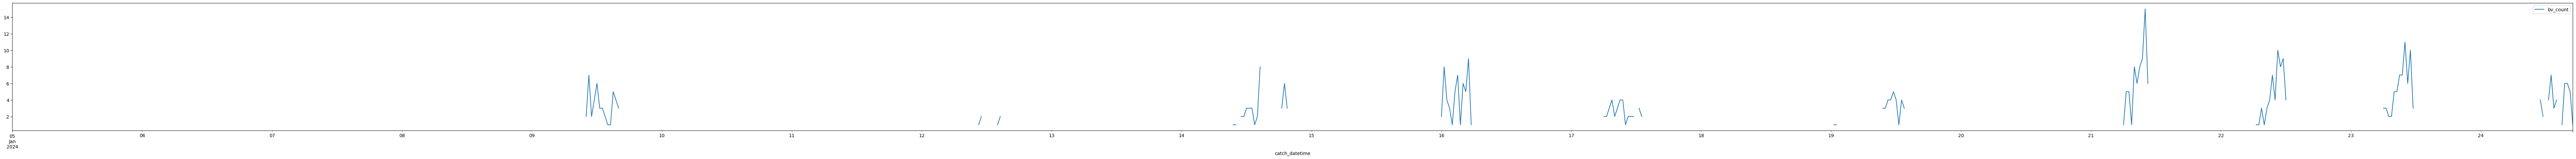

In [42]:
from dateutil.parser import parse as parse_dt
from datetime import datetime, timedelta, timezone, date, time
# import datetime
import pandas as pd

# df.datetime = pd.to_datetime(df.datetime, utc=True)

# ping_series = pd.Series(list(df.ping), list(df.datetime), dtype='string').astype('float')
# ping_series.loc['2024-01-18 22']


# maxmin = pd.DataFrame({
#     "max": ping_series.resample('1d').max(), 
#     "min": ping_series.resample('1d').min()
# })
# print(maxmin.sort_index().to_string())

bv_df.catch_datetime = pd.to_datetime(bv_df.catch_datetime)

bv_df = bv_df.append(pd.DataFrame([
    [(pd.Timestamp(trip_start_date) + timedelta(0)).replace(tzinfo=timezone.utc), ''],
    [(pd.Timestamp(trip_start_date) + timedelta(hours=23,minutes=59)).replace(tzinfo=timezone.utc), ''],
], columns=['catch_datetime', 'fish_id']))

# bv_df

cnt = bv_df.groupby('catch_datetime').count()[['fish_id']]

# cnt
bv_cnt_ts = cnt.resample(timedelta(minutes=30)).sum(min_count=1)
bv_cnt_ts['bv_count'] = bv_cnt_ts.pop('fish_id')

# bv_cnt_ts.plot()
bv_cnt_ts.plot(figsize=(100,5))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  


,aifish_count
start_datetime,
2024-01-05 08:00:00-08:00,18.0
2024-01-05 08:30:00-08:00,13.0
2024-01-05 09:00:00-08:00,7.0
2024-01-05 09:30:00-08:00,15.0
2024-01-05 10:00:00-08:00,10.0
...,...
2024-01-25 16:00:00-08:00,0.0
2024-01-25 16:30:00-08:00,0.0
2024-01-25 17:00:00-08:00,0.0


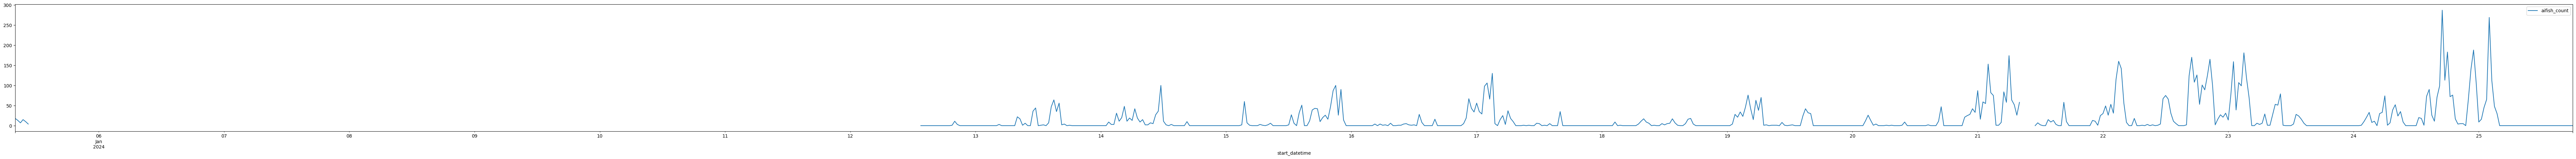

In [46]:

if boat != 'brancol':
    raise Error('wrong boat')
aif_df
aif_df.start_datetime = pd.to_datetime(aif_df.start_datetime)

cnt = aif_df.groupby('start_datetime').sum()[['count']]

# cnt.count()
cnt['count'] = pd.to_numeric(cnt['count'])
# cnt.dtypes
# cnt = cnt[cnt != '<NA>']
# # cnt[cnt.index[0]]
# cnt.loc['2024-01-16']

aif_cnt_ts = cnt.resample(timedelta(minutes=30)).sum(min_count=1)
# aif_cnt_ts
# aif_cnt_ts.loc['2024-01-16']
aif_cnt_ts['aifish_count'] = aif_cnt_ts.pop('count')

display(aif_cnt_ts)

aif_cnt_ts.plot(figsize=(100,5))


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  


,aifish_count
start_datetime,
2024-01-05 08:00:00-08:00,18.0
2024-01-05 08:30:00-08:00,13.0
2024-01-05 09:00:00-08:00,7.0
2024-01-05 09:30:00-08:00,15.0
2024-01-05 10:00:00-08:00,10.0
...,...
2024-01-25 16:00:00-08:00,0.0
2024-01-25 16:30:00-08:00,0.0
2024-01-25 17:00:00-08:00,0.0


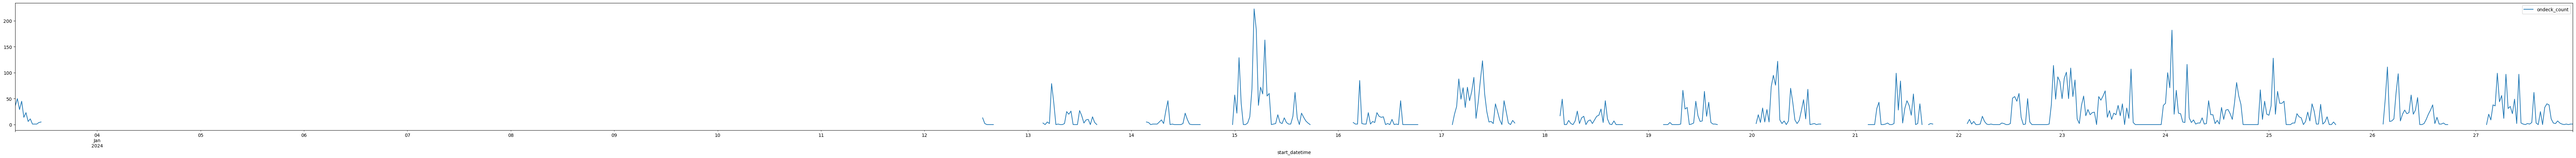

In [50]:

if boat != 'stpatrick':
    raise Error('wrong boat')
ond_df
ond_df.start_datetime = pd.to_datetime(ond_df.start_datetime)

cnt = ond_df.groupby('start_datetime').sum()[['overallcount']]

# cnt.count()
cnt['count'] = pd.to_numeric(cnt['overallcount'])
# cnt.dtypes
# cnt = cnt[cnt != '<NA>']
# # cnt[cnt.index[0]]
# cnt.loc['2024-01-16']

ond_cnt_ts = cnt.resample(timedelta(minutes=30)).sum(min_count=1)
# ond_cnt_ts
# ond_cnt_ts.loc['2024-01-16']
ond_cnt_ts['ondeck_count'] = ond_cnt_ts.pop('count')

# display(aif_cnt_ts)

ond_cnt_ts.plot(figsize=(100,5))


In [ ]:
## try to find an error value

#first, add additional values to BV data, 0s where ondeckdata exists but bv data does not

bv_zeros_cnt_ts = bv_cnt_ts
for (k,v) in bv_cnt_ts.loc[]

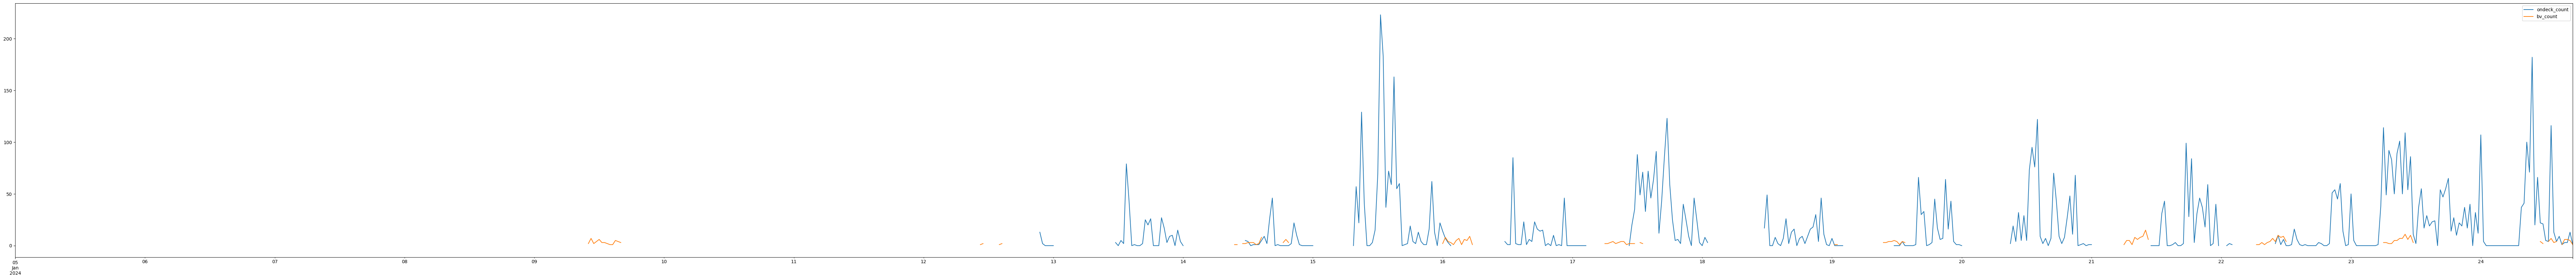

In [51]:

if boat == 'brancol':
    both_ts = aif_cnt_ts.merge(bv_cnt_ts, left_index=True, right_index=True)
if boat == 'stpatrick':
    both_ts = ond_cnt_ts.merge(bv_cnt_ts, left_index=True, right_index=True)

both_ts.plot(figsize=(100,10))


In [34]:

if boat != 'brancol':
    raise Error('wrong boat')

elog_df = awswrangler.athena.read_sql_query(f"SELECT * from brancol_v1_deckhandevents_mostrecentlonglineevent_jsonextracted where systemstartsetdatetime >= '{trip_start_date}' and systemendhauldatetime <= '{trip_end_date}'", database="tnc_edge")

# '{trip_start_date}' and start_datetime < '{trip_end_date}'
elog_df

,id,jsonblob,datetime,bycatchcount,catchcount,systemstartsetdatetime,systemstartsetlatitude,systemstartsetlongitude,systemendsetdatetime,systemendsetlatitude,...,systemstarthaullongitude,systemendhauldatetime,systemendhaullatitude,systemendhaullongitude,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2
0,142,"{""catch"": [{""amount"": 1, ""species"": ""Thunnus a...",2024-02-06 14:29:05.878725-08,1,15,2024-02-04 12:56:50.699682-08,8.66742,-86.19048,2024-02-04 16:55:06.480773-08,8.8189,...,-86.3378,2024-02-05 09:15:40.279545-08,8.78984,-86.02663,2024-02-06 23:27:55,2024/2/6/1707262065-0.csv,b0b4a90e-e433-49a2-b24f-033f5d6c3a39,2024,2,6
1,152,"{""catch"": [{""amount"": 2, ""species"": ""Thunnus a...",2024-02-14 20:37:45.472316-08,0,15,2024-02-14 03:30:10.090019-08,8.37064,-86.2594,2024-02-14 09:20:10.299736-08,8.17721,...,-85.77261,2024-02-14 20:36:24.888874-08,8.40121,-85.9206,2024-02-15 14:31:50,2024/2/15/1708007502-0.csv,ff9e1aa4-919b-4d6f-b870-7defaa3cb1ca,2024,2,15
2,140,"{""catch"": [{""amount"": 1, ""species"": ""Thunnus a...",2024-02-05 09:33:28.575723-08,1,15,2024-02-04 12:56:50.699682-08,8.66742,-86.19048,2024-02-04 16:55:06.480773-08,8.8189,...,-86.3378,2024-02-05 09:15:40.279545-08,8.78984,-86.02663,2024-02-05 18:12:01,2024/2/5/1707156710-0.csv,5c790224-1617-4a15-b6f6-27eb88ab741e,2024,2,5
3,143,"{""catch"": [{""amount"": 1, ""species"": ""Thunnus a...",2024-02-06 22:03:10.19595-08,0,44,2024-02-06 03:16:50.109147-08,8.74494,-87.0544,2024-02-06 07:07:38.075058-08,8.55712,...,-86.6313,2024-02-06 22:00:15.813855-08,8.6875,-86.79122,2024-02-07 12:02:17,2024/2/7/1707307327-0.csv,55ccae04-ee94-45b7-82ed-d40583ab7ef3,2024,2,7
4,145,"{""catch"": [{""amount"": 11, ""species"": ""Coryphae...",2024-02-08 04:18:01.426966-08,1,20,2024-02-07 03:49:53.044018-08,8.63464,-87.00324,2024-02-07 07:41:41.659013-08,8.44511,...,-86.54535,2024-02-08 04:15:14.31422-08,8.39921,-86.54535,2024-02-08 12:32:05,2024/2/8/1707395515-0.csv,4e7ff4d1-ac6b-4446-979e-bd6e7047581c,2024,2,8
5,153,"{""catch"": [{""amount"": 2, ""species"": ""Thunnus a...",2024-02-17 09:29:13.019717-08,0,18,2024-02-16 09:24:38.438671-08,7.76831,-86.17971,2024-02-16 13:28:34.350616-08,7.91973,...,-86.07117,2024-02-17 09:28:01.047071-08,7.77765,-85.7232,2024-02-17 19:58:46,2024/2/17/1708199917-0.csv,5069db73-e563-443d-9da0-d159a113ab26,2024,2,17
6,158,"{""catch"": [{""amount"": 2, ""species"": ""Xiphias g...",2024-02-24 08:33:50.455594-08,0,9,2024-02-23 11:51:49.145078-08,7.66363,-85.66337,2024-02-23 15:15:22.021316-08,7.79779,...,-85.65876,2024-02-24 08:29:48.880275-08,7.86937,-85.35468,2024-02-24 17:32:09,2024/2/24/1708795921-0.csv,49dcaf07-3ce7-404c-bc8a-00536eb9b88f,2024,2,24
7,154,"{""catch"": [{""amount"": 2, ""species"": ""Coryphaen...",2024-02-19 11:25:03.964013-08,1,10,2024-02-18 10:26:25.672795-08,6.54124,-85.90118,2024-02-18 14:27:53.755007-08,6.12909,...,-85.91715,2024-02-19 11:24:47.414163-08,6.33645,-86.00601,2024-02-19 20:35:43,2024/2/19/1708374933-0.csv,1c3f85d5-9beb-4053-975c-b1e90eea40da,2024,2,19
8,156,"{""catch"": [{""amount"": 2, ""species"": ""Thunnus a...",2024-02-21 08:01:15.796532-08,2,10,2024-02-20 13:35:46.998138-08,6.87621,-86.05218,2024-02-20 17:51:35.891736-08,7.10797,...,-86.22071,2024-02-21 07:52:09.768339-08,7.00752,-85.94676,2024-02-21 16:17:22,2024/2/21/1708532237-0.csv,a936ebab-40ba-4dbb-a359-4ba276345015,2024,2,21
9,150,"{""catch"": [{""amount"": 1, ""species"": ""Kajikia a...",2024-02-11 08:32:12.364133-08,1,15,2024-02-10 15:05:51.981462-08,8.26493,-85.90929,2024-02-10 18:48:33.926947-08,8.36721,...,-85.94312,2024-02-11 08:31:47.753743-08,8.50091,-85.64414,2024-02-11 17:25:05,2024/2/11/1707672296-0.csv,b149e1af-8850-4026-a0e4-ea886e5f68bf,2024,2,11


In [23]:

if boat != 'stpatrick':
    raise Error('wrong boat')

elog_df = awswrangler.athena.read_sql_query(f"SELECT * from stpatrick_v1_deckhandevents_mostrecentlonglineevent_jsonextracted where systemstartsetdatetime >= '{trip_start_date}' and systemendhauldatetime <= '{trip_end_date}'", database="tnc_edge")

display(elog_df[elog_df.columns.difference(['jsonblob'])].to_string())

# elog_df

'  bycatchcount catchcount                       datetime  id                md_file_name                        md_ingest_uuid  md_timestamp_added partition_0 partition_1 partition_2          systemendhauldatetime systemendhaullatitude systemendhaullongitude           systemendsetdatetime systemendsetlatitude systemendsetlongitude        systemstarthauldatetime systemstarthaullatitude systemstarthaullongitude         systemstartsetdatetime systemstartsetlatitude systemstartsetlongitude\n0            0         25    2024-01-25 10:48:23.6819-08  84  2024/1/25/1706209469-0.csv  5a179288-1c90-4386-81a1-5f8994b8f4a2 2024-01-25 19:04:40        2024           1          25  2024-01-25 03:05:59.070799-08               8.17215               -83.9585   2024-01-24 07:36:51.42689-08               8.0767             -83.65184  2024-01-24 15:14:43.999238-08                  8.1244                -83.66308  2024-01-24 04:04:16.733388-08                8.13871               -83.93651\n1            0 

In [35]:
elog_df_ts = None

for (k, row) in elog_df.iterrows():
    start_haul = parse_dt(row['systemstarthauldatetime'])
    end_haul = parse_dt(row['systemendhauldatetime'])
#     print(end_haul - start_haul)
    i = pd.DatetimeIndex([start_haul, end_haul])
    df = pd.DataFrame(index=i)
#     df['mycol'] = [0, 0]
    df = df.resample(timedelta(minutes=5)).sum()
    df['elog_count'] = (float(row['catchcount']) + float(row['bycatchcount'])) / len(df.index)
#     print(df)
#     break
    if elog_df_ts is None:
        elog_df_ts = df
    else:
        elog_df_ts = elog_df_ts.append(df)
 
elog_df_ts


elog_df_ts = elog_df_ts.resample(timedelta(minutes=30)).sum(min_count=1)
elog_df_ts
# elog_df_ts.loc['2024-01-16']

# elog_df_ts.plot(figsize=(100,5))


,elog_count
2024-02-05 03:30:00-08:00,2.318841
2024-02-05 04:00:00-08:00,2.782609
2024-02-05 04:30:00-08:00,2.782609
2024-02-05 05:00:00-08:00,2.782609
2024-02-05 05:30:00-08:00,2.782609
...,...
2024-02-24 06:00:00-08:00,1.058824
2024-02-24 06:30:00-08:00,1.058824
2024-02-24 07:00:00-08:00,1.058824
2024-02-24 07:30:00-08:00,1.058824


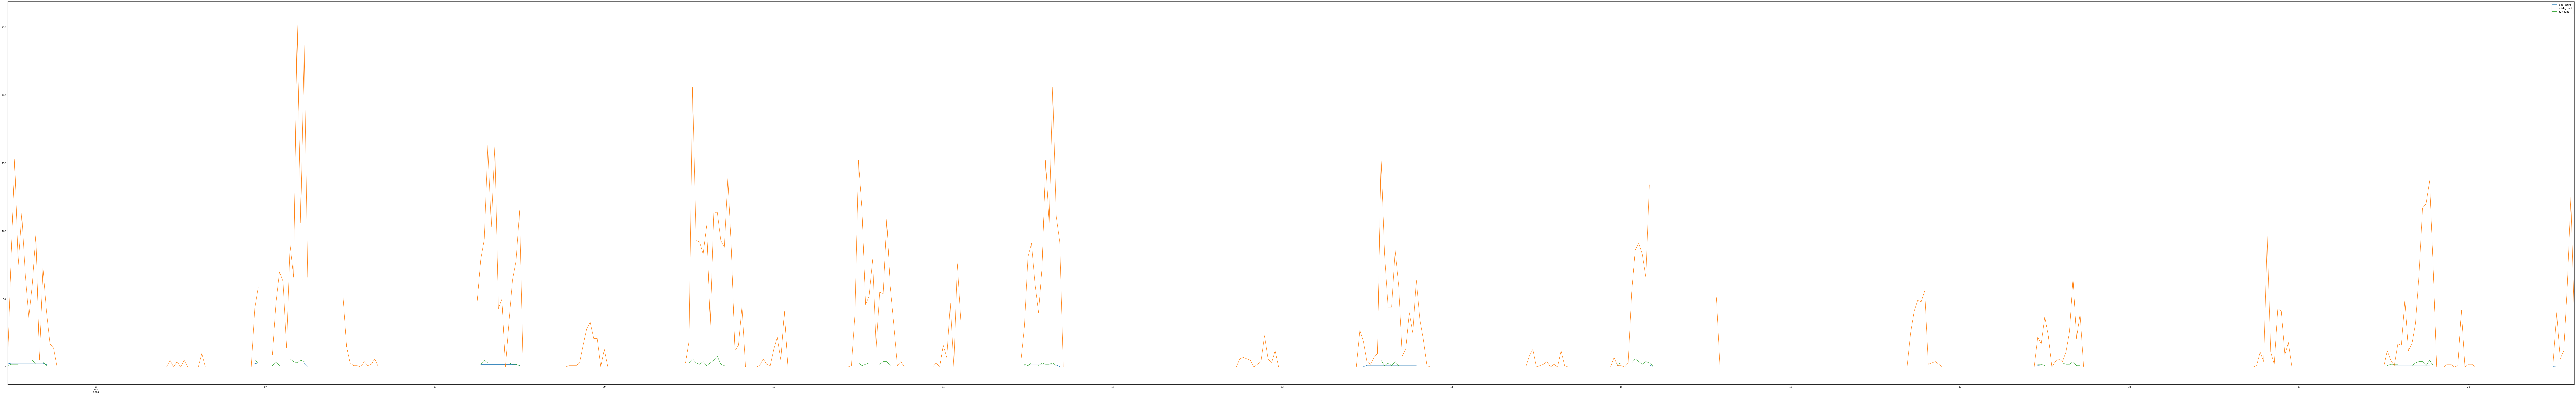

In [36]:
triple_df = elog_df_ts.merge(both_ts, left_index=True, right_index=True)

triple_df.plot(figsize=(200,30))

In [224]:
aif_df['tmp'] = pd.to_datetime(aif_df['start_datetime'])

aif_df.loc[aif_df['tmp'] >= parse_dt('2024-01-13 22:25:00Z')].loc[aif_df['tmp'] <= parse_dt('2024-01-13 23:55:00Z')].sort_values('tmp')
# 

# aif_df

,id,video_uri,processing_uri,output_uri,datetime,count,runtimems,detection_confidence,status,md_timestamp_added,md_file_name,md_ingest_uuid,partition_0,partition_1,partition_2,start_datetime,tmp
980,3188,/videos/20240113T222500Z_cam1.avi,/videos/processing/20240113T222500Z_cam1.avi,/videos/output/20240113T222500Z_cam1.json,2024-01-13 14:36:40.743295-08,7.0,271064.66,0.46675694,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 14:25:00-08:00,2024-01-13 14:25:00-08:00
2404,3190,/videos/20240113T223500Z_cam1.avi,/videos/processing/20240113T223500Z_cam1.avi,/videos/output/20240113T223500Z_cam1.json,2024-01-13 14:46:42.600812-08,18.0,189115.86,0.60285217,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 14:35:00-08:00,2024-01-13 14:35:00-08:00
1423,3192,/videos/20240113T224000Z_cam1.avi,/videos/processing/20240113T224000Z_cam1.avi,/videos/output/20240113T224000Z_cam1.json,2024-01-13 14:51:44.024557-08,21.0,210451.75,0.57980764,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 14:40:00-08:00,2024-01-13 14:40:00-08:00
981,3193,/videos/20240113T224500Z_cam1.avi,/videos/processing/20240113T224500Z_cam1.avi,/videos/output/20240113T224500Z_cam1.json,2024-01-13 14:56:45.473913-08,8.0,195331.83,0.579173,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 14:45:00-08:00,2024-01-13 14:45:00-08:00
2405,3196,/videos/20240113T225000Z_cam1.avi,/videos/processing/20240113T225000Z_cam1.avi,/videos/output/20240113T225000Z_cam1.json,2024-01-13 15:01:47.151239-08,0.0,12.005329,0.0,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 14:50:00-08:00,2024-01-13 14:50:00-08:00
39,3198,/videos/20240113T225500Z_cam1.avi,/videos/processing/20240113T225500Z_cam1.avi,/videos/output/20240113T225500Z_cam1.json,2024-01-13 15:06:48.798652-08,0.0,8.000374,0.0,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 14:55:00-08:00,2024-01-13 14:55:00-08:00
2615,3200,/videos/20240113T230000Z_cam1.avi,/videos/processing/20240113T230000Z_cam1.avi,/videos/output/20240113T230000Z_cam1.json,2024-01-13 15:11:50.402629-08,16.0,204851.06,0.5161258,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 15:00:00-08:00,2024-01-13 15:00:00-08:00
1422,3202,/videos/20240113T230500Z_cam1.avi,/videos/processing/20240113T230500Z_cam1.avi,/videos/output/20240113T230500Z_cam1.json,2024-01-13 15:16:51.824691-08,0.0,11.998892,0.0,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 15:05:00-08:00,2024-01-13 15:05:00-08:00
2401,3204,/videos/20240113T231000Z_cam1.avi,/videos/processing/20240113T231000Z_cam1.avi,/videos/output/20240113T231000Z_cam1.json,2024-01-13 15:21:53.330837-08,22.0,225183.28,0.5224475,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 15:10:00-08:00,2024-01-13 15:10:00-08:00
977,3205,/videos/20240113T231500Z_cam1.avi,/videos/processing/20240113T231500Z_cam1.avi,/videos/output/20240113T231500Z_cam1.json,2024-01-13 15:26:55.294207-08,6.0,153663.39,0.4911091,done,2024-01-14 01:23:43,2024/1/14/1705195419-0.csv,6f020ce7-4990-4c0a-8962-0e170e92ea12,2024,1,14,2024-01-13 15:15:00-08:00,2024-01-13 15:15:00-08:00
